# **Model to diagnose Breast Cancer**

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC


In [4]:

df = pd.read_csv('https://archive.ics.uci.edu/static/public/17/data.csv')
df.head(10)

,ID,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M
5,843786,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,M
6,844359,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,M
7,84458202,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,M
8,844981,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,M
9,84501001,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,M


In [5]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

# Step 2: Removing duplicates
data = df.drop_duplicates()

Missing values:
 ID                    0
radius1               0
texture1              0
perimeter1            0
area1                 0
smoothness1           0
compactness1          0
concavity1            0
concave_points1       0
symmetry1             0
fractal_dimension1    0
radius2               0
texture2              0
perimeter2            0
area2                 0
smoothness2           0
compactness2          0
concavity2            0
concave_points2       0
symmetry2             0
fractal_dimension2    0
radius3               0
texture3              0
perimeter3            0
area3                 0
smoothness3           0
compactness3          0
concavity3            0
concave_points3       0
symmetry3             0
fractal_dimension3    0
Diagnosis             0
dtype: int64


In [6]:
# Step 3: Encoding categorical variables
label_encoder = LabelEncoder()
data['Diagnosis'] = label_encoder.fit_transform(data['Diagnosis'])

# Step 4: Feature scaling
scaler = StandardScaler()
numerical_features = data.drop(columns=['ID', 'Diagnosis']) # Assuming ID is not a feature
data[numerical_features.columns] = scaler.fit_transform(numerical_features)

In [7]:
# Step 5: Splitting the dataset
X = data.drop(columns=['Diagnosis'])
y = data['Diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

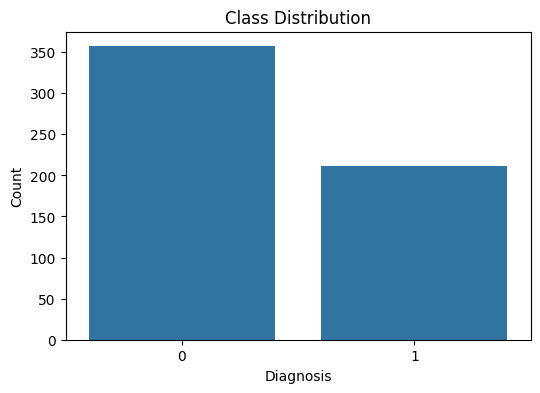

In [8]:
# 1. Class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Diagnosis', data=data)
plt.title('Class Distribution')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

In [13]:
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("Support Vector Machine Accuracy:", svm_accuracy)

Support Vector Machine Accuracy: 0.6228070175438597


<Figure size 800x600 with 0 Axes>

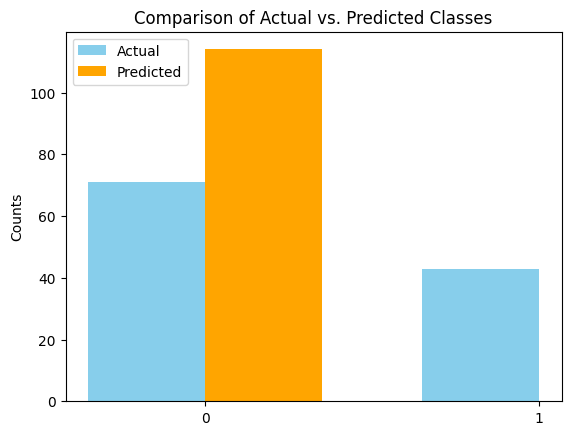

In [14]:
# Get predicted classes
predicted_classes = svm_model.predict(X_test)

# Create a dataframe for actual and predicted classes
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': predicted_classes})

# Count the occurrences of each class
comparison_counts = comparison_df.apply(pd.Series.value_counts)

# Plotting
plt.figure(figsize=(8, 6))
labels = comparison_counts.index
actual_values = comparison_counts['Actual']
predicted_values = comparison_counts['Predicted']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, actual_values, width, label='Actual', color='skyblue')
rects2 = ax.bar(x + width/2, predicted_values, width, label='Predicted', color='orange')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Counts')
ax.set_title('Comparison of Actual vs. Predicted Classes')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()